# Flipkart Reviews Sentiment Analysis

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR51jBha83eqRg8WU_KAl3ekTB2da2Z1nfC78UCTKoMvw&s'>

Flipkart is one of the most popular Indian companies. It is an e-commerce platform that competes with popular e-commerce platforms like Amazon. 

By applying NLP, the project aims to harness the power of language analysis to gain insights and extract information from the reviews provided by users. These techniques allow for comprehensive analysis and evaluation of the text data, contributing to a deeper understanding of user sentiments and preferences. 

<a href='https://huggingface.co/spaces/ttugba/sentiment_analysis' target=_blank> Sentiment Analysis App </a>

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

### Read Data

In [2]:
df=pd.read_csv('flipkart.csv')

### EDA

In [3]:
df.head()

,Unnamed: 0,Product_name,Review,Rating
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


In [4]:
df=df.drop('Unnamed: 0',axis=1)

In [5]:
df.shape

(2304, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_name  2304 non-null   object
 1   Review        2304 non-null   object
 2   Rating        2304 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 54.1+ KB


In [7]:
df.isnull().sum()

Product_name    0
Review          0
Rating          0
dtype: int64

In [8]:
df['Product_name'].unique()

array(['Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop\xa0\xa0(15.6 inch, Shadow Black, 2.25$$kg kg)',
       'DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop\xa0\xa0(15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)',
       'ASUS VivoBook 15 (2021) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS Thin and Light Laptop\xa0\xa0(15.6 inch, Transparent Silver, 1.80 kg, With MS Office)',
       'Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15ITL6 Thin and Light Laptop\xa0\xa0(15.6 inch, Arctic Grey, 1.65 kg, With MS Office)',
       'HP Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-dy3501TU Thin and Light Laptop\xa0\xa0(15.6 inch, Natural Silver, 1.75 kg, With MS Office)',
       'ASUS VivoBook 15 (2021) Core i3 11th Gen - (4 GB/256 GB SSD/Windows 10 Home) X515EA-EJ302TS Th

In [9]:
ratings= df['Rating'].value_counts()
ratings

Rating
5    1382
4     552
1     184
3     140
2      46
Name: count, dtype: int64

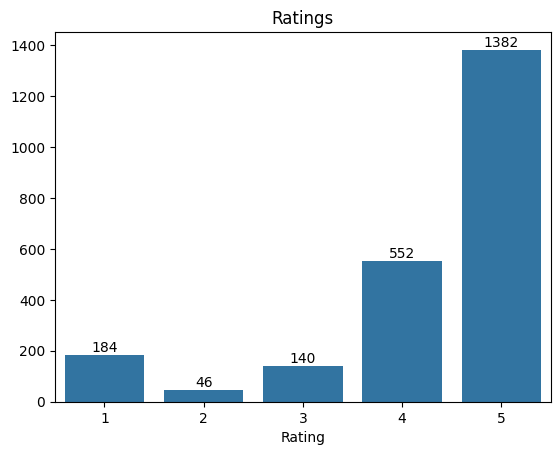

In [10]:
ax=sns.barplot(x=ratings.index,y=ratings.values)
ax.bar_label(ax.containers[0])
ax.set_title('Ratings');

### Adding Sentiment Features

In [11]:
negative=df[df['Rating']<3].Rating
neutral=df[df['Rating']==3].Rating
positive=df[df['Rating']>3].Rating

In [12]:
df['sentiment'] = df['Rating'].apply(lambda x: 'negative' if x in [1,2] else ('neutral' if x==3 else 'positive'))

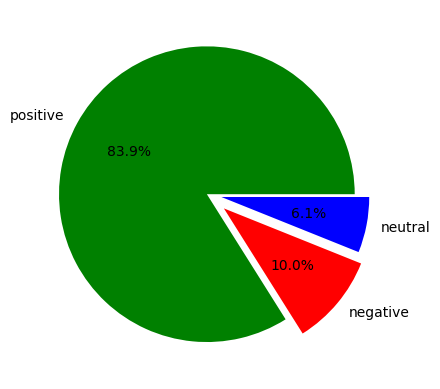

In [13]:
x=df.sentiment.value_counts(normalize=True)
label=['positive','negative','neutral'] 
color=['green','red','blue']
plt.pie(x,labels=label,colors=color,autopct='%1.1f%%',explode=[0,0.15,0.1]);

## NLP

In [50]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
from nltk import ngrams
from langdetect import detect
from textblob import TextBlob,Word
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tugba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tugba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tugba\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Removing Characters

In [15]:
df['Review']=df['Review'].str.replace('\d', '',regex=True)
df['Review']=df['Review'].str.replace('[^\w\s]','',regex=True)
df['Review']=df['Review'].str.replace('\n','',regex=True)  
df['Review']=df['Review'].str.replace('\r','',regex=True)
df['Review']=df['Review'].str.lower()

### Detecting Language

In [16]:
df['language']=df['Review'].apply(detect)
df=df[df['language']=='en']
df.drop(index=df[df['language']!='en'].index,inplace=True)

### Removing Accents

In [23]:
from unicodedata import normalize

df["Review"] =df["Review"].apply(lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore"))

### Applying Stemming & Lemmatisation

In [24]:
# Initialize the lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Function to apply stemming and lemmatization to a text
def apply_stemming_lemmatization(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Apply stemming and lemmatization to each token
    processed_tokens = []
    for token in tokens:
        # Apply lemmatization
        lemmatized_token = lemmatizer.lemmatize(token)
        
        # Apply stemming
        stemmed_token = stemmer.stem(lemmatized_token)
        
        processed_tokens.append(stemmed_token)
    
    # Join the processed tokens back into a string
    processed_text = ' '.join(processed_tokens)
    
    return processed_text

# Apply stemming and lemmatization to the 'Review' column
df['Review'] = df['Review'].apply(apply_stemming_lemmatization)

# Print the modified DataFrame
print(df['Review'])

0       best under k great performancei got it for aro...
1                                             good perfom
2       great perform but usual it ha also that game l...
3                    my wife is so happi and best product
4       light weight laptop with new amaz featur batte...
                              ...                        
2298          cool and best in below prize rang go for it
2299         great display accur colour at thi price rang
2300    superb monitor first brought use for month and...
2302                             onli one issu with adapt
2303    worth the money u spend for thi monitor great ...
Name: Review, Length: 1923, dtype: object


In [25]:
# Initialize an empty list to store the corrected sentences
corrected_sentences = []

# Iterate over each sentence in the 'Review' column
for sentence in df['Review']:
    # Create a TextBlob object for the sentence
    blob = TextBlob(sentence)
    # Correct the sentence
    corrected_sentence = str(blob.correct())
    # Append the corrected sentence to the list
    corrected_sentences.append(corrected_sentence)

In [26]:
df['new_review'] = corrected_sentences
df['new_review']

0       best under k great performance got it for arou...
1                                            good perform
2       great perform but usual it ha also that game l...
3                    my wife is so happy and best product
4       light weight lawton with new may feature batte...
                              ...                        
2298          cool and best in below prize rang go for it
2299         great display occur colour at the price rang
2300    superb monitor first brought use for month and...
2302                            only one issue with adapt
2303    worth the money u spend for the monitor great ...
Name: new_review, Length: 1923, dtype: object

### WordCloud

In [27]:
df_new=df[['sentiment','Rating','new_review']]
df_new

,sentiment,Rating,new_review
0,positive,5,best under k great performance got it for arou...
1,positive,5,good perform
2,positive,5,great perform but usual it ha also that game l...
3,positive,5,my wife is so happy and best product
4,positive,5,light weight lawton with new may feature batte...
...,...,...,...
2298,positive,5,cool and best in below prize rang go for it
2299,positive,5,great display occur colour at the price rang
2300,positive,5,superb monitor first brought use for month and...
2302,positive,5,only one issue with adapt


In [28]:
def wc(data, bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('cloud.png'))
    wc = WordCloud(background_color=bgcolor, stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')

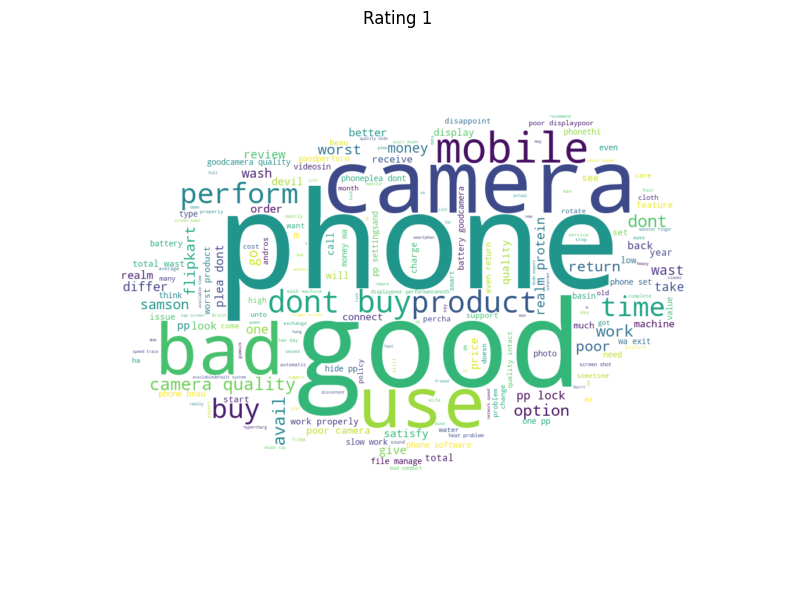

In [30]:
r_1=df[df['Rating']==1]['new_review']
wc(r_1,'white')
plt.title('Rating 1');

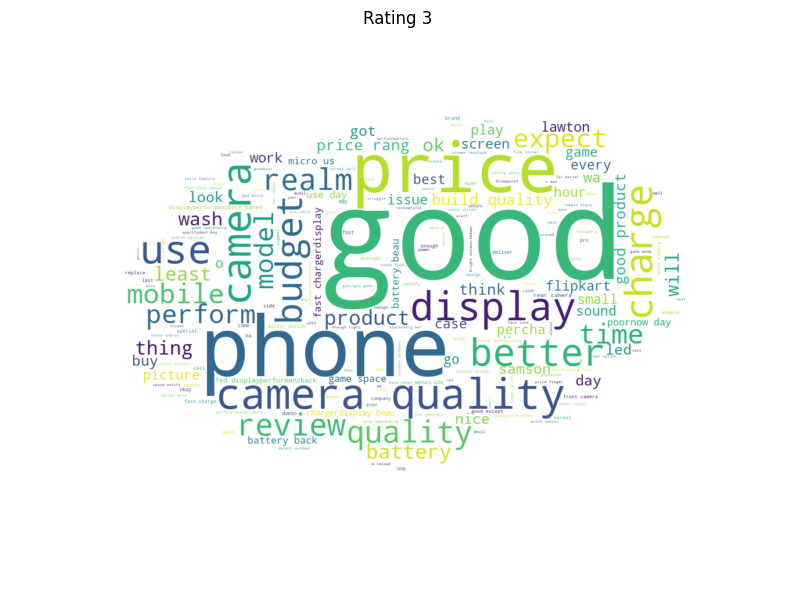

In [29]:
r_3=df[df['Rating']==3]['new_review']
wc(r_3,'white')
plt.title('Rating 3');

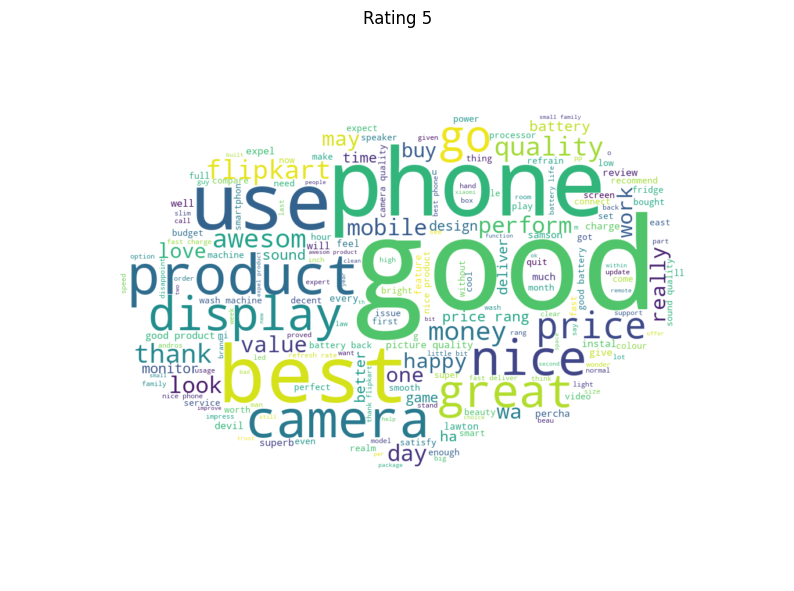

In [31]:
r_5=df[df['Rating']==5]['new_review']
wc(r_5,'white')
plt.title('Rating 5');

## Modelling

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
lr=LogisticRegression(),
k=KNeighborsClassifier(),
r=RandomForestClassifier(),
bnb=BernoulliNB()

### Split dataset into x (feature) and y (target)

In [38]:
x=df.new_review 
y=df.sentiment

### Split dataset into training and test sets

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)

In [40]:
vectorizer1=CountVectorizer()
x_train_vec1=vectorizer1.fit_transform(x_train) 
x_test_vec1=vectorizer1.transform(x_test)

In [41]:
vectorizer2=CountVectorizer(ngram_range=(1, 2))
x_train_vec2=vectorizer2.fit_transform(x_train) 
x_test_vec2=vectorizer2.transform(x_test)

In [42]:
vectorizer3=TfidfVectorizer()
x_train_vec3=vectorizer3.fit_transform(x_train) 
x_test_vec3=vectorizer3.transform(x_test)

In [43]:
vectorizer4=TfidfVectorizer(ngram_range=(1, 2))
x_train_vec4=vectorizer4.fit_transform(x_train) 
x_test_vec4=vectorizer4.transform(x_test)

In [44]:
models=[LogisticRegression(),
KNeighborsClassifier(),
RandomForestClassifier(),
BernoulliNB()]

In [59]:
for model in models:
    model.fit(x_train_vec1,y_train) 
    y_pred1=model.predict(x_test_vec1)
    accuracy1=accuracy_score(y_test,y_pred1)
    report1 = classification_report(y_test, y_pred1)
    
    model.fit(x_train_vec2,y_train)  
    y_pred2=model.predict(x_test_vec2)
    accuracy2=accuracy_score(y_test,y_pred2)
    report2 = classification_report(y_test, y_pred2)
    
    model.fit(x_train_vec3,y_train)  
    y_pred3=model.predict(x_test_vec3)
    accuracy3=accuracy_score(y_test,y_pred3)
    report3 = classification_report(y_test, y_pred3)
    
    model.fit(x_train_vec4,y_train)  
    y_pred4=model.predict(x_test_vec4)
    accuracy4=accuracy_score(y_test,y_pred4)
    report4 = classification_report(y_test, y_pred4)

    print(f"{model.__class__.__name__}: Classification Report(Count Vectorizer):\n{report1}")
    print(f"{model.__class__.__name__}: Classification Report(Count Vectorizer, Ngram):\n{report2}")
    print(f"{model.__class__.__name__}: Classification Report(TF-IDF):\n{report3}")
    print(f"{model.__class__.__name__}: Classification Report(TF-IDF, Ngram):\n{report4}")

LogisticRegression: Classification Report(Count Vectorizer):
              precision    recall  f1-score   support

    negative       0.90      0.85      0.88        41
     neutral       0.62      0.62      0.62        16
    positive       0.97      0.98      0.97       328

    accuracy                           0.95       385
   macro avg       0.83      0.82      0.82       385
weighted avg       0.95      0.95      0.95       385

LogisticRegression: Classification Report(Count Vectorizer, Ngram):
              precision    recall  f1-score   support

    negative       0.97      0.80      0.88        41
     neutral       0.92      0.69      0.79        16
    positive       0.96      1.00      0.98       328

    accuracy                           0.96       385
   macro avg       0.95      0.83      0.88       385
weighted avg       0.96      0.96      0.96       385

LogisticRegression: Classification Report(TF-IDF):
              precision    recall  f1-score   support

   

The reports show the precision, recall, F1-score, and support for each class ('negative', 'neutral', 'positive'). Based on these results, we can see that the Random Forest Classifier has the highest accuracy and F1-score.

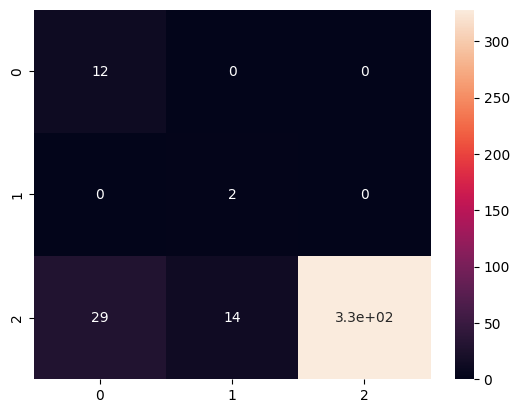

In [47]:
sns.heatmap(confusion_matrix(y_pred1,y_test),annot=True);

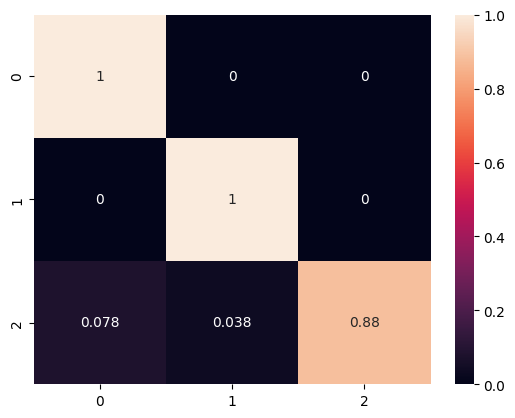

In [48]:
cm = confusion_matrix(y_pred1, y_test)
normalized_cm = cm / cm.sum(axis=1, keepdims=True)  # Normalizing the confusion matrix

sns.heatmap(normalized_cm, annot=True);

### Calculating Polarity, Subjectivity

In [49]:
# Calculate polarity and subjectivity using TextBlob
df['polarity'] = df['new_review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['new_review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Print the polarity and subjectivity values
df[['new_review', 'polarity', 'subjectivity']]

,new_review,polarity,subjectivity
0,best under k great performance got it for arou...,0.412667,0.449667
1,good perform,0.700000,0.600000
2,great perform but usual it ha also that game l...,-0.050000,0.560000
3,my wife is so happy and best product,0.900000,0.650000
4,light weight lawton with new may feature batte...,0.268182,0.577273
...,...,...,...
2298,cool and best in below prize rang go for it,0.675000,0.475000
2299,great display occur colour at the price rang,0.800000,0.750000
2300,superb monitor first brought use for month and...,0.625000,0.666667
2302,only one issue with adapt,0.000000,1.000000


### Calculating Pos, Neg, Neu, Compound

In [51]:
# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores using SentimentIntensityAnalyzer
def calculate_sentiment_scores(text):
    scores = sia.polarity_scores(text)
    return scores

# Apply sentiment analysis to the 'text' column
df['sentiment_scores'] = df['new_review'].apply(calculate_sentiment_scores)

# Extract individual sentiment scores
df['pos'] = df['sentiment_scores'].apply(lambda x: x['pos'])
df['neg'] = df['sentiment_scores'].apply(lambda x: x['neg'])
df['neu'] = df['sentiment_scores'].apply(lambda x: x['neu'])
df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Print the sentiment scores
df[['new_review', 'pos', 'neg', 'neu', 'compound']]

,new_review,pos,neg,neu,compound
0,best under k great performance got it for arou...,0.313,0.074,0.613,0.9540
1,good perform,0.744,0.000,0.256,0.4404
2,great perform but usual it ha also that game l...,0.205,0.000,0.795,0.8294
3,my wife is so happy and best product,0.605,0.000,0.395,0.8808
4,light weight lawton with new may feature batte...,0.000,0.000,1.000,0.0000
...,...,...,...,...,...
2298,cool and best in below prize rang go for it,0.583,0.000,0.417,0.8689
2299,great display occur colour at the price rang,0.369,0.000,0.631,0.6249
2300,superb monitor first brought use for month and...,0.255,0.000,0.745,0.6249
2302,only one issue with adapt,0.000,0.000,1.000,0.0000


In [52]:
df['result'] = df[['pos', 'neg', 'neu']].idxmax(axis=1)
# The 'result' column will contain the label of the sentiment category ('pos', 'neg', or 'neu') that has the highest value for each row in the DataFrame.

In [54]:
df.sample(5)

,Product_name,Review,Rating,sentiment,language,new_review,polarity,subjectivity,sentiment_scores,pos,neg,neu,compound,result
193,LAVA Flip (Blue),super cute oner though i alway use samsung one...,5,positive,en,super cut one though i away use samson one plu...,0.216667,0.453333,"{'neg': 0.156, 'neu': 0.498, 'pos': 0.346, 'co...",0.346,0.156,0.498,0.8860,neu
2227,LG 21.5 inch Full HD IPS Panel Ultra Thin Moni...,monitor is great on it own but it wasnt a wort...,4,positive,en,monitor is great on it own but it want a worth...,0.166667,0.493939,"{'neg': 0.047, 'neu': 0.767, 'pos': 0.186, 'co...",0.186,0.047,0.767,0.9217,neu
1557,"realme C25Y (Glacier Blue, 128 GB) (4 GB RAM)",the build of the phone is veri good and packag...,4,positive,en,the build of the phone is very good and packag...,0.492500,0.440000,"{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'comp...",0.192,0.000,0.808,0.8791,neu
653,Vu Premium TV 80 cm (32 inch) HD Ready LED Sma...,veri poor not a smart tv it semi smart tv with...,1,negative,en,very poor not a smart to it semi smart to with...,-0.137619,0.688571,"{'neg': 0.434, 'neu': 0.566, 'pos': 0.0, 'comp...",0.000,0.434,0.566,-0.8145,neu
401,SAMSUNG 253 L Frost Free Double Door 3 Star Re...,main thing is space manag samsung manag but no...,3,neutral,en,main thing is space manage samson manage but n...,0.459048,0.389524,"{'neg': 0.042, 'neu': 0.761, 'pos': 0.197, 'co...",0.197,0.042,0.761,0.8953,neu


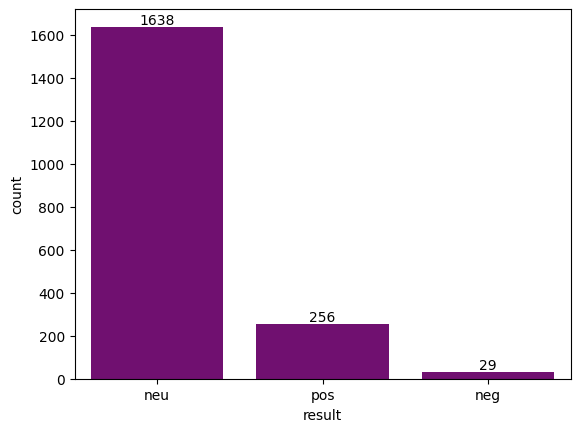

In [56]:
ax=sns.countplot(x=df['result'], color='purple')
ax.bar_label(ax.containers[0]);

Most of the reviews are neutral.

In [79]:
# Save model
import pickle

pickle.dump(model,open('sentiment_analysis_model.pkl','wb'))